## Balaram(major project)

,Student_ID,Student_Name,Gender,School_Type,Socio_Economic_Status,Chemistry_Score,Physics_Score,Maths_Score,Program_Type
0,IN001,Aarav Sharma,Male,Public,High,61,77,81,Vocational
1,IN002,Ananya Iyer,Female,Private,Low,65,98,99,Vocational
2,IN003,Ishaan Verma,Male,Public,Medium,75,74,68,Vocational
3,IN004,Meera Nair,Male,Public,Medium,75,82,70,Vocational
4,IN005,Rohan Das,Male,Private,High,97,87,54,Vocational


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

Improved Accuracy: 42.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.63      0.51        19
           1       0.42      0.24      0.30        21

    accuracy                           0.42        40
   macro avg       0.42      0.43      0.41        40
weighted avg       0.42      0.42      0.40        40



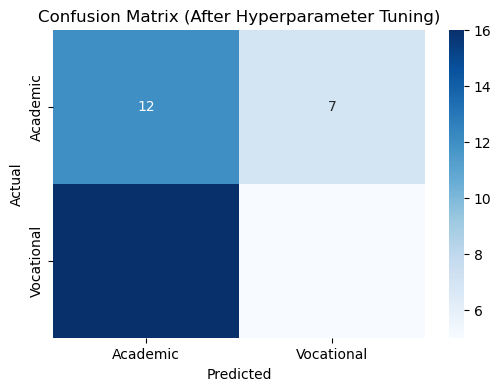

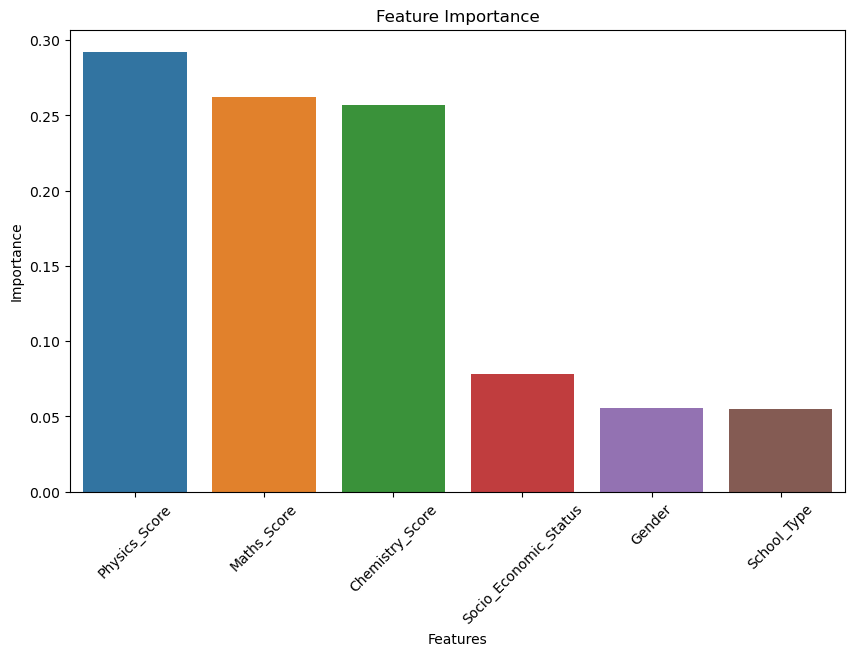

c:\Users\blrm9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blrm9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blrm9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


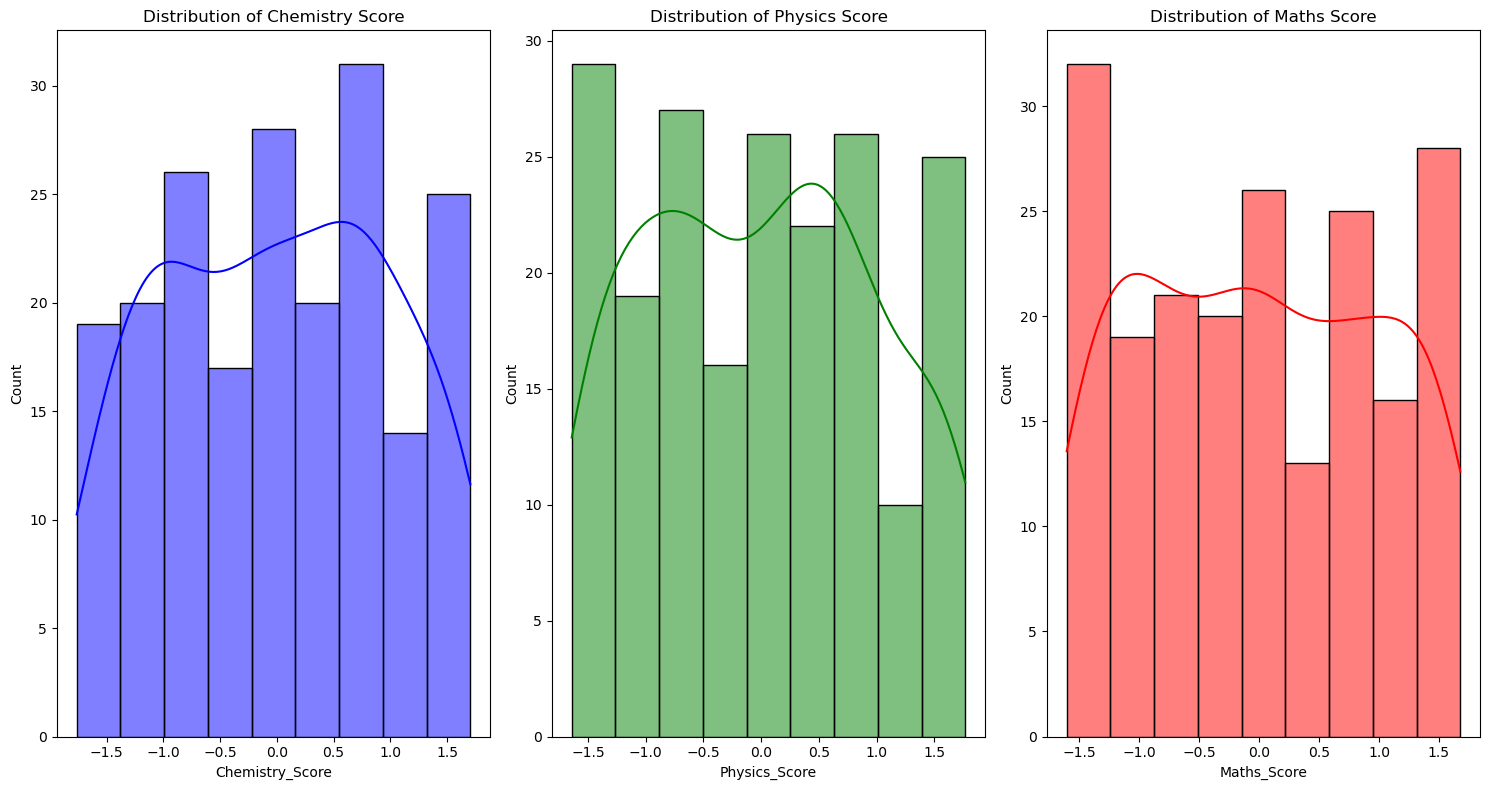

c:\Users\blrm9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blrm9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blrm9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


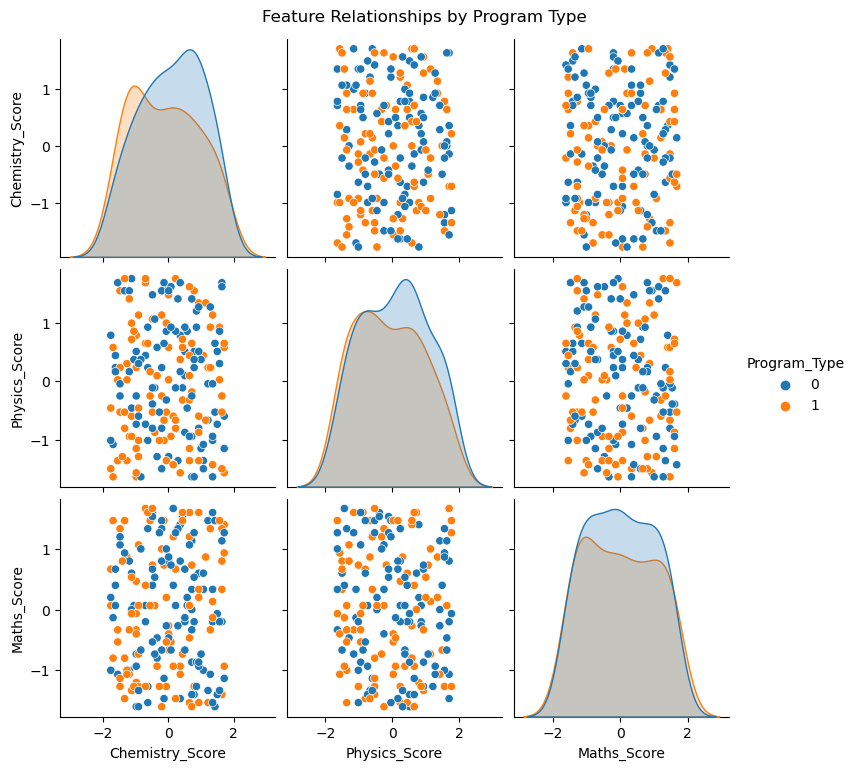

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# student names
student_names = [
    "Aarav Sharma", "Ananya Iyer", "Ishaan Verma", "Meera Nair", 
    "Rohan Das", "Diya Kapoor", "Karthik Rao", "Sneha Joshi", 
    "Aditya Gupta", "Pooja Patel"
]

n_samples = 200
names_list = student_names * (n_samples // len(student_names)) + student_names[:n_samples % len(student_names)]

data = {
    'Student_ID': [f"IN{str(i).zfill(3)}" for i in range(1, n_samples + 1)],  # Unique IDs
    'Student_Name': names_list,                                             # Fixed names
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'School_Type': np.random.choice(['Public', 'Private'], n_samples),
    'Socio_Economic_Status': np.random.choice(['Low', 'Medium', 'High'], n_samples),
    'Chemistry_Score': np.random.randint(50, 100, n_samples),
    'Physics_Score': np.random.randint(50, 100, n_samples),
    'Maths_Score': np.random.randint(50, 100, n_samples),
    'Program_Type': np.random.choice(['Academic', 'Vocational'], n_samples)
}

df = pd.DataFrame(data)
display(df.head())  # Show initial rows of the dataset

# Encode categorical variables
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['School_Type'] = encoder.fit_transform(df['School_Type'])
df['Socio_Economic_Status'] = encoder.fit_transform(df['Socio_Economic_Status'])
df['Program_Type'] = encoder.fit_transform(df['Program_Type'])

# Scale numerical features
scaler = StandardScaler()
df[['Chemistry_Score', 'Physics_Score', 'Maths_Score']] = scaler.fit_transform(
    df[['Chemistry_Score', 'Physics_Score', 'Maths_Score']]
)

# Define features and target
X = df[['Gender', 'School_Type', 'Socio_Economic_Status',
        'Chemistry_Score', 'Physics_Score', 'Maths_Score']]
y = df['Program_Type']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform GridSearchCV
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and improved model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nImproved Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Academic', 'Vocational'],
            yticklabels=['Academic', 'Vocational'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After Hyperparameter Tuning)')
plt.show()

# Feature Importance
feature_importances = pd.DataFrame(best_model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

# Distribution of Scores
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
sns.histplot(df['Chemistry_Score'], kde=True, color='blue')
plt.title('Distribution of Chemistry Score')
plt.subplot(1, 3, 2)
sns.histplot(df['Physics_Score'], kde=True, color='green')
plt.title('Distribution of Physics Score')
plt.subplot(1, 3, 3)
sns.histplot(df['Maths_Score'], kde=True, color='red')
plt.title('Distribution of Maths Score')
plt.tight_layout()
plt.show()

# Pairplot for Feature Relationships
sns.pairplot(df, hue='Program_Type', vars=['Chemistry_Score', 'Physics_Score', 'Maths_Score'])
plt.suptitle("Feature Relationships by Program Type", y=1.02)
plt.show()
